## Exercise 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### Step 1 - Install and import libraries
#### Step 2 - Import data and conduct necessary cleaning and manipulations 
#### Step 3 - Use the elbow technique
#### Step 4 - Decide on the number of clusters
#### Step 5 - Run the k-means algorithm
#### Step 6 - Attach new cluster column to the dataframe
#### Step 7 - Create visualizations
#### Step 8 - Discuss clusters
#### Step 9 - Calculate descriptive statistics for clusters
#### Step 10 - Propose what the results could be useful for in the future

### Step 1 - Install and import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### Step 2 - Import data and conduct necessary cleaning and manipulations

In [3]:
path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6\09-2023 FHL Bank Data Analysis'

In [4]:
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FHL_bank_data_borr1_clean.pkl'))

In [5]:
df_all.shape

(101202, 25)

In [6]:
df_all.head()

,County,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Monthly Income Range,Borrower 1 Age,Age Range,Borrower 1 Race,Borrower 1 Gender,...,Total Debt Expense Ratio Percent,Loan Purpose,Mortgage Type,First Time Homebuyer,Property Usage,Property Type,Loan Count,Borrower Count,Total Loan Count per State,Max Note Amount per State
0,Chittenden,Vermont,2019,2407198,7308,"5,000 - 11,999",34.0,Under 35,White,Female,...,40.46,Purchase,FHA,Yes,Principal Residence,Single family detached,1,1,332,547560
1,Chittenden,Vermont,2019,2407199,7416,"5,000 - 11,999",36.0,35 - 44,White,Female,...,45.67,Purchase,FHA,No,Principal Residence,Single family detached,1,2,332,547560
2,Lamoille,Vermont,2019,2407200,5143,"5,000 - 11,999",34.0,Under 35,White,Male,...,46.23,Purchase,FHA,No,Principal Residence,Single family detached,1,2,332,547560
3,Orange,Vermont,2019,2407201,8866,"5,000 - 11,999",42.0,35 - 44,White,Male,...,36.88,Purchase,VA,No,Principal Residence,Single family detached,1,2,332,547560
4,York,Maine,2019,2407202,15240,"12,000+",66.0,65+,White,Female,...,34.95,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,1,229,575000


In [7]:
# Create dataframe with only numerical data
df_num = df_all[['Year','Total Monthly Income Amount', 'Note Amount', 'Borrower 1 Age', 'Borrower 1 Credit Score Value', 'Property Unit Count', 'Note Rate Percent', 'Total Debt Expense Ratio Percent', 'Loan Count', 'Borrower Count', 'Total Loan Count per State', 'Max Note Amount per State']].copy()

#Check output of new DataFrame
df_num.head()

,Year,Total Monthly Income Amount,Note Amount,Borrower 1 Age,Borrower 1 Credit Score Value,Property Unit Count,Note Rate Percent,Total Debt Expense Ratio Percent,Loan Count,Borrower Count,Total Loan Count per State,Max Note Amount per State
0,2019,7308,319113,34.0,1,1,4.000,40.46,1,1,332,547560
1,2019,7416,248005,36.0,3,1,4.250,45.67,1,2,332,547560
2,2019,5143,211105,34.0,2,1,4.250,46.23,1,2,332,547560
3,2019,8866,210000,42.0,4,1,4.875,36.88,1,2,332,547560
4,2019,15240,233200,66.0,5,1,4.625,34.95,1,1,229,575000


In [8]:
# Clean the extreme values from the "Total Monthly Income" variable.
df2 = df_num[df_num['Total Monthly Income Amount'] <=150000]

# Check Shape
df.shape

(101178, 12)

### Step 3 - Use the elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\clust

[-2536676165971426.5,
 -1383422214591568.8,
 -843697271644332.0,
 -586590795242394.4,
 -419137037607066.5,
 -321750999302942.25,
 -262730180563915.56,
 -221902043331861.94,
 -192242743812280.16]

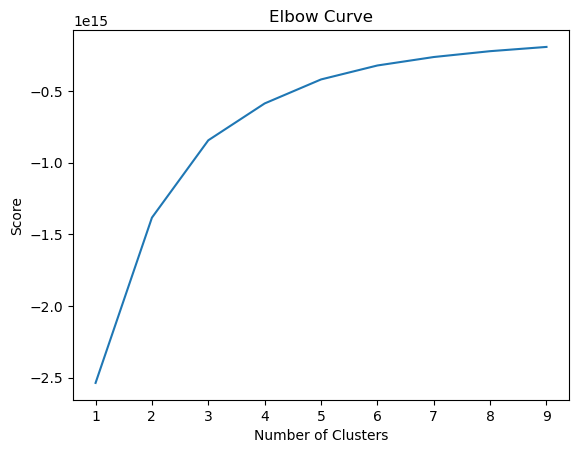

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Step 4 - There's a large jump from two to five on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is five.

### Step 5 - Run the k-means algorithm

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

### Step 6 - Attach new cluster column to the dataframe

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\AppData\Local\Temp\ipykernel_7576\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [15]:
df.head()

,Year,Total Monthly Income Amount,Note Amount,Borrower 1 Age,Borrower 1 Credit Score Value,Property Unit Count,Note Rate Percent,Total Debt Expense Ratio Percent,Loan Count,Borrower Count,Total Loan Count per State,Max Note Amount per State,clusters
0,2019,7308,319113,34.0,1,1,4.000,40.46,1,1,332,547560,1
1,2019,7416,248005,36.0,3,1,4.250,45.67,1,2,332,547560,1
2,2019,5143,211105,34.0,2,1,4.250,46.23,1,2,332,547560,1
3,2019,8866,210000,42.0,4,1,4.875,36.88,1,2,332,547560,1
4,2019,15240,233200,66.0,5,1,4.625,34.95,1,1,229,575000,1


In [16]:
df['clusters'].value_counts()

2    43255
1    37006
3    14742
0     4483
4     1692
Name: clusters, dtype: int64

### Step 7 - Create visualizations

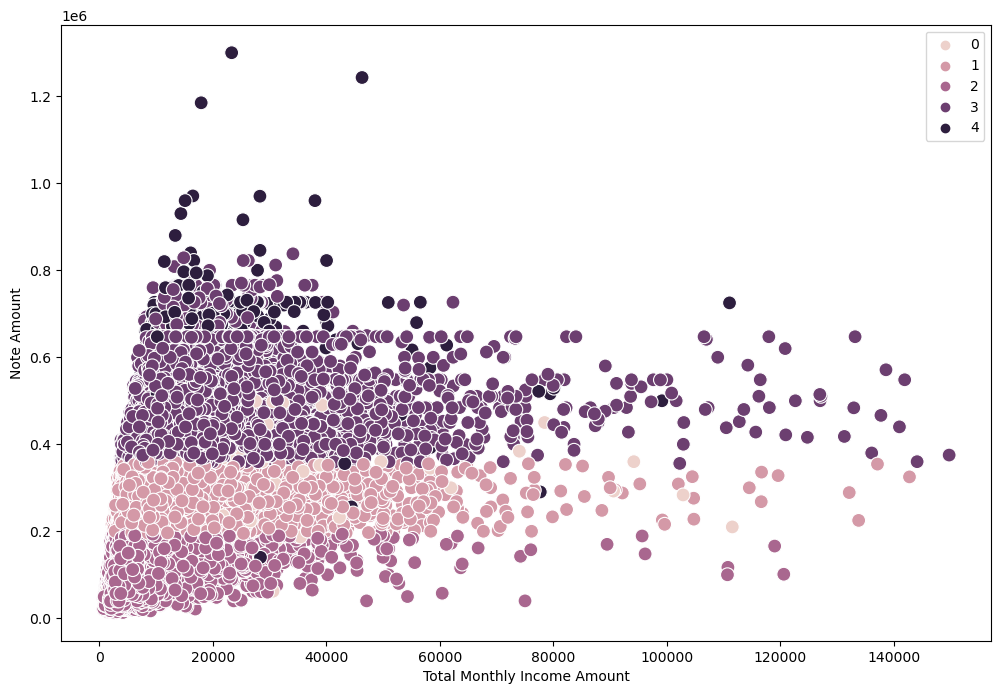

In [17]:
# Plot the clusters for the "Note Amount" and "Total Monthly Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Monthly Income Amount'], y=df['Note Amount'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Total Monthly Income Amount') # Label x-axis.
plt.ylabel('Note Amount') # Label y-axis.
plt.show()

### Step 8 - Discuss clusters

Note Amount vs. Total Monthly Income Amount:

The highest Note Amounts are in the lower Monthly Income Amounts

Cluster 0 (Light Pink) - 2nd to lowest Note Amount with Total Monthly Income Amounts that start to diminish past 100k and very few data points exceeding 200k

Cluster 1 (Dark Pink) - Lowest Note Amount; as the Total Monthly Income Amount increases, the frequency of points diminish and there are less of the higher note amount data points

Cluster 2 (Light Purple) - Highest Note Amount despite having the lowest Total Monthly Income amount (under 100k); 2nd to least popular cluster, with very few data points represented; 

Cluster 3 (Dark Purple) - Least Populated cluster interspersed between the other clusters and barely visible; Most data points associated with Borrower age 25 - 75; lowest max debt expense ratio - does not exceed 50%; shortest note rate percent range - b/w 2.5% to 6%

Cluster 4 (Black) - 2nd Highest to Highest Note Amounts, representing the most populated cluster and the most data points in the highest Total Monthly Income Amounts; Most data points associated with Borrower age 25 - 85

### Step 9 - Calculate descriptive statistics for clusters

In [24]:
# Create groupings

df.loc[df['clusters'] == 4, 'cluster'] = 'black'
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'light purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\jomok\AppData\Local\Temp\ipykernel_7576\367087720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 4, 'cluster'] = 'black'


In [25]:
df.groupby('cluster').agg({'Total Monthly Income Amount':['mean', 'median'], 
                         'Note Amount':['mean', 'median'], 
                         'Borrower 1 Age':['mean', 'median'],
                         'Note Rate Percent':['mean', 'median'], 
                         'Total Debt Expense Ratio Percent':['mean', 'median']})

Total Monthly Income Amount             Note Amount            \
                                    mean   median           mean    median   
cluster                                                                      
black                       14418.177305  12518.5  504177.753546  518125.0   
dark pink                   10252.345971   8976.0  264117.998487  259000.0   
dark purple                 16658.960453  14114.5  451855.304775  438900.0   
light pink                  10004.018291   8622.0  259551.191167  261250.0   
light purple                 6113.148145   5167.0  127000.876985  130150.0   

             Borrower 1 Age        Note Rate Percent         \
                       mean median              mean median   
cluster                                                       
black             41.868794   39.0          4.169924  4.125   
dark pink         40.696211   37.0          3.902950  3.750   
dark purple       42.288563   40.0          3.966120  3.750   
light pink        42.029891   39.0          3.847814  3.750   
light purple      40.122136   36.0          3.768972  3.625   

             Total Debt Expense Ratio Percent          
                                         mean  median  
cluster                                                
black                               36.759544  37.505  
dark pink                           32.523096  33.000  
dark purple                         33.605431  34.440  
light pink                          33.573185  34.140  
light purple                        30.427024  30.680

Discuss findings:  

The black and light purple seem to have the best statistics, however, they also have the highest debt expense ratio, which isn't good.

The highest average Note Amount is also associated with the highest average age, rate percent and debt expense ratio and the light purple cluster; however, it's the second highest average note amount that's associated with the highest average monthly income amount and with the black cluster group.

### Step 10 - Propose what the results could be useful for in the future

Discussion:  The results could be useful for dividing into categories such as older high income borrowers or low debt, low income, middle-aged borrowers.  I could also build upon this analysis using a classification algorithm to predict prices that borrowers are willing to pay for homes.